# Priprema podataka

### Opis podataka
Prema opisu preuzetog skupa podataka, cijeli skup podataka je od slika jednog donora. Ukupno je 569 primjera. Stupce čine ID, dijagnoza i 30 izmjerenih značajki. Dijagnoza je B-benign ili M-malignant. U kontekstu strojnog učenja, dijagnoza je izlaz. Značajke su izračunate za svaku stanicu (1 primjer = 1 stanica). Setovi su linearno odvojivi.

In [711]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy import stats

### Učitavanje podataka

In [712]:
header = [
    "ID number", "Diagnosis",
    "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness",
    "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal dimension",
    "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE",
    "Concavity SE", "Concave Points SE", "Symmetry SE", "Fractal dimension SE",
    "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness",
    "Worst Concavity", "Worst Concave Points", "Worst Symmetry", "Worst Fractal dimension"
]

data = pd.read_csv("wdbc.data", header=None, names=header)

In [713]:
data.head()

,ID number,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Monotoni atributi

In [714]:
data.nunique()

ID number                  569
Diagnosis                    2
Mean Radius                456
Mean Texture               479
Mean Perimeter             522
Mean Area                  539
Mean Smoothness            474
Mean Compactness           537
Mean Concavity             537
Mean Concave Points        542
Mean Symmetry              432
Mean Fractal dimension     499
Radius SE                  540
Texture SE                 519
Perimeter SE               533
Area SE                    528
Smoothness SE              547
Compactness SE             541
Concavity SE               533
Concave Points SE          507
Symmetry SE                498
Fractal dimension SE       545
Worst Radius               457
Worst Texture              511
Worst Perimeter            514
Worst Area                 544
Worst Smoothness           411
Worst Compactness          529
Worst Concavity            539
Worst Concave Points       492
Worst Symmetry             500
Worst Fractal dimension    535
dtype: i

#### "ID number" je monotoni atribut pa se izbacuje iz skupa podataka.

In [715]:
data.drop(('ID number'), axis=1, inplace=True)

In [716]:
data.head()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Provjera nedostajućih podataka
Očekivani rezultat je da nema nedostajućih podataka, kao što je navedeno u opisu dataseta (datoteka wdbc.names).

In [717]:
data.isna().sum()

Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal dimension     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal dimension SE       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal dimension    0
dtype: int64

### LabelEncoder
Jedina značajka s ne-numeričkim vrijednostima je "Diagnosis". Kako bi se značajka koristila u daljnjem radu, potrebno je promijeniti format značajke koristeći LabelEncoder.

In [718]:
data.select_dtypes(exclude=['number'])

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [719]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.loc[:,'Diagnosis'])

data.loc[:,'Diagnosis'] = le.transform(data.loc[:,'Diagnosis'])
data['Diagnosis'] = data['Diagnosis'].astype(int)

B = benign -> nova oznaka 0

M = malignant -> nova oznaka 1

In [720]:
data.head()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Stršeći podatci

In [721]:
data.describe()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Iz trenutnog ispisa neke vrijednosti čine se stršećima, no treba uzeti u obzir dvije klase dijagnoze (B i M) koje utječu na ostale značajke.

In [722]:
grouped_data = data.groupby('Diagnosis')

# Postavke da se vidi cijela deskriptivna statistika
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# dijagnoza = B
grouped_data.describe().loc[0]

Mean Radius              count     357.000000
                         mean       12.146524
                         std         1.780512
                         min         6.981000
                         25%        11.080000
                         50%        12.200000
                         75%        13.370000
                         max        17.850000
Mean Texture             count     357.000000
                         mean       17.914762
                         std         3.995125
                         min         9.710000
                         25%        15.150000
                         50%        17.390000
                         75%        19.760000
                         max        33.810000
Mean Perimeter           count     357.000000
                         mean       78.075406
                         std        11.807438
                         min        43.790000
                         25%        70.870000
                         50%      

In [723]:
# dijagnoza = M
grouped_data.describe().loc[1]

Mean Radius              count     212.000000
                         mean       17.462830
                         std         3.203971
                         min        10.950000
                         25%        15.075000
                         50%        17.325000
                         75%        19.590000
                         max        28.110000
Mean Texture             count     212.000000
                         mean       21.604906
                         std         3.779470
                         min        10.380000
                         25%        19.327500
                         50%        21.460000
                         75%        23.765000
                         max        39.280000
Mean Perimeter           count     212.000000
                         mean      115.365377
                         std        21.854653
                         min        71.900000
                         25%        98.745000
                         50%      

In [724]:
# Vraćanje postavki
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Pošto značajki ima puno, možda je stršeće vrijednosti lakše uočiti vizualizacijom podataka

# Vizualizacija podataka
Od ukupno 569 primjera, njih 357 dijagnosticirano je kao benigno i 212 kao maligno.

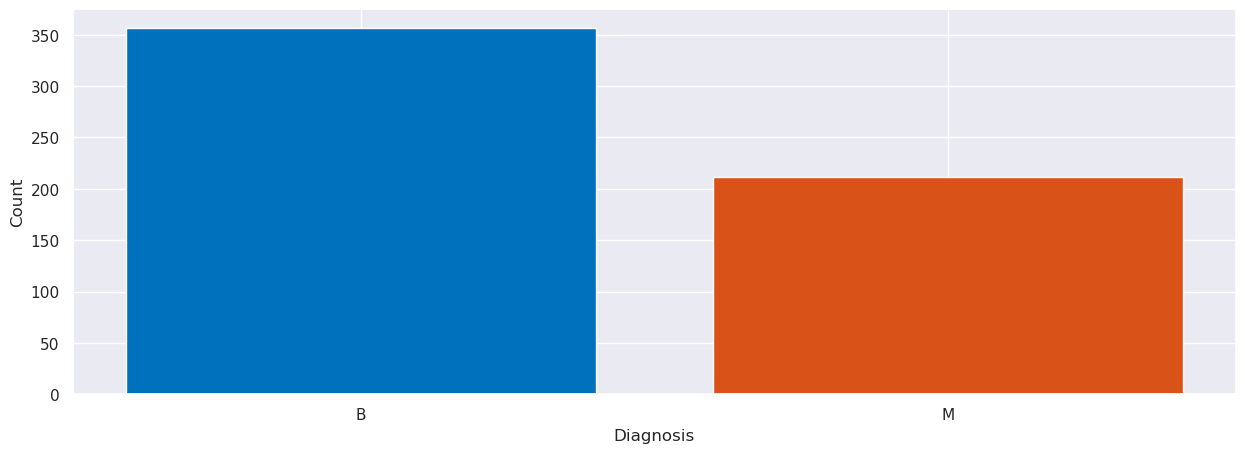

In [725]:
count = data['Diagnosis'].value_counts()
colors = ["#0072BD","#D95319"]

plt.bar(count.index, count.values, color=colors)
plt.xticks([0, 1], ["B", "M"])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

### Drugi pogled na stršeće podatke
Stršeći podatci najbolje se mogu vidjeti pomoću scatter i box plota.

Na sljedećim dijagramima prikazana je značajka "Mean Concavity" s obzirom na dijagnozu. Veća konkavnost povezana je s malignim stanicama. Mogu se uočiti mogući outlieri.

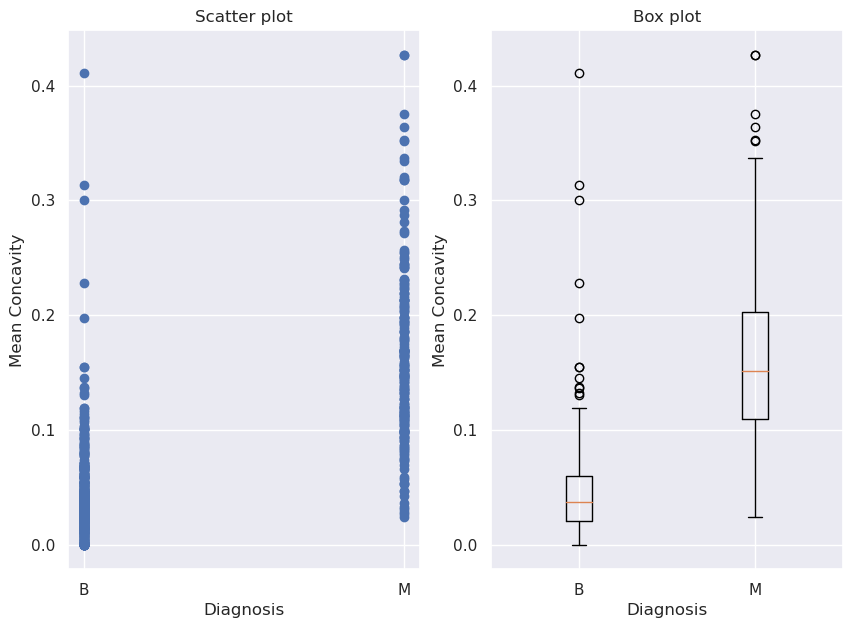

In [726]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.scatter(data["Diagnosis"], data["Mean Concavity"])
plt.xticks([0, 1], ["B", "M"])
plt.xlabel("Diagnosis")
plt.ylabel("Mean Concavity")
plt.title("Scatter plot")

plt.subplot(1,2,2)
B = data[data["Diagnosis"] == 0]["Mean Concavity"]
M = data[data["Diagnosis"] == 1]["Mean Concavity"]
plt.boxplot([B, M], labels=["B", "M"])
plt.xlabel("Diagnosis")
plt.ylabel("Mean Concavity")
plt.title("Box plot")

plt.show()

### Korelacija između značajki
Korisno je provjeriti korelaciju pojedinačnih značajki s izlaznom dijagnozom. Značajke s malom korelacijom mogu se ukloniti jer ne utječu značajno na dijagnozu.

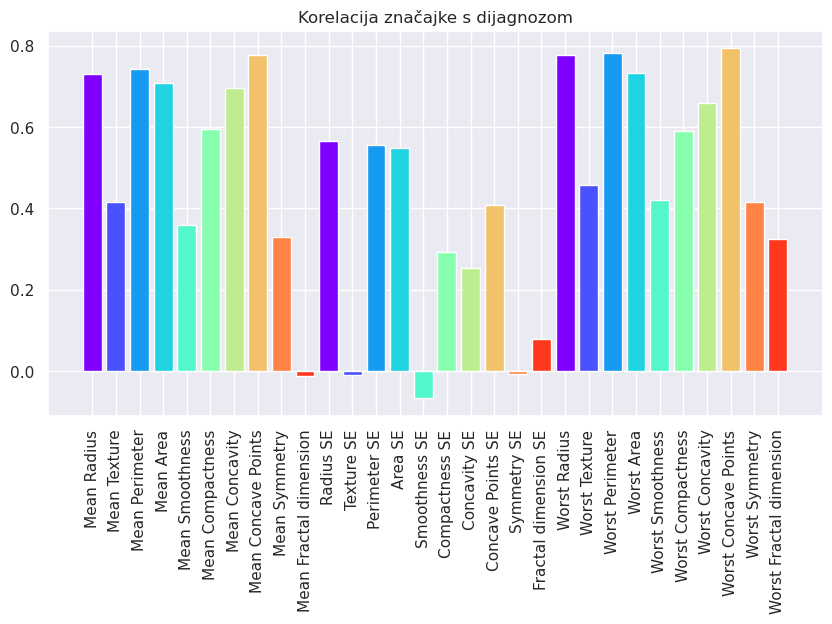

In [727]:
plt.figure(figsize=(10,5))
corr = []
cmap = plt.get_cmap("rainbow", 30)
for feature in header[2:]:
    correlation, p_value = stats.pointbiserialr(data["Diagnosis"], data[feature])
    corr.append(correlation)
plt.bar(header[2:], corr, color=cmap(range(0,30,3)))
plt.xticks(rotation=90)
plt.title("Korelacija značajke s dijagnozom")
plt.show()

U teoriji, veća fraktalna dimenzija povezana je s malignim stanicama. Međutim, u ovom skupu podataka je između te značajke i dijagnoze mala korelacija. 

Osim značajke "Mean Fractal dimension", korelacija je također mala između dijagnoze i značajki "Texture SE" i "Symmetry SE". Te značajke mogu se ukloniti iz skupa podataka.

Na scatter plotu se vidi kako se iz fraktalne dimenzije ne može jednoznačno odrediti dijagnoza.

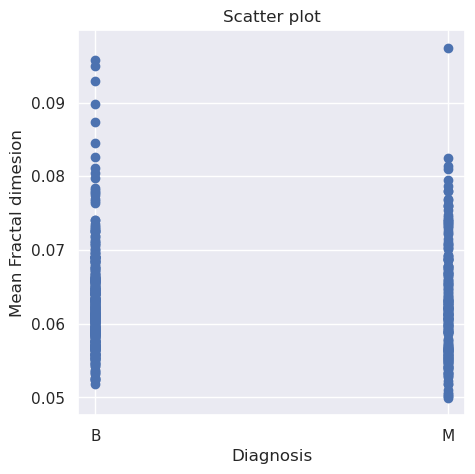

In [728]:
plt.figure(figsize=(5,5))
plt.scatter(data["Diagnosis"], data["Mean Fractal dimension"])
plt.xticks([0, 1], ["B", "M"])
plt.xlabel("Diagnosis")
plt.ylabel("Mean Fractal dimesion")
plt.title("Scatter plot")
plt.show()

#### Korelacija svih značajki
Radi smanjenja dimenzionalnosti skupa podataka, značajke koje su u visokoj korelaciji s nekom drugom značajkom mogu se izbaciti.

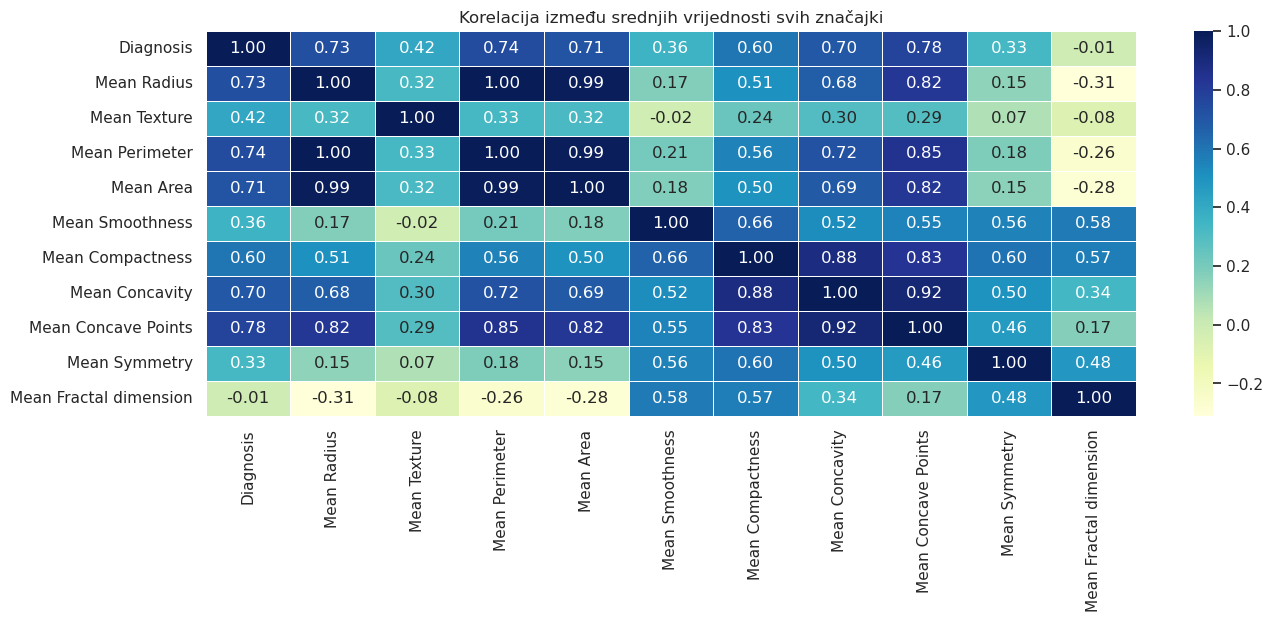

In [729]:
sns.set(rc={'figure.figsize':(15,5)})
mean_data = data.loc[:, data.columns.str.contains("Mean|Diagnosis")]
sns.heatmap(mean_data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Korelacija između srednjih vrijednosti svih značajki")
plt.show()

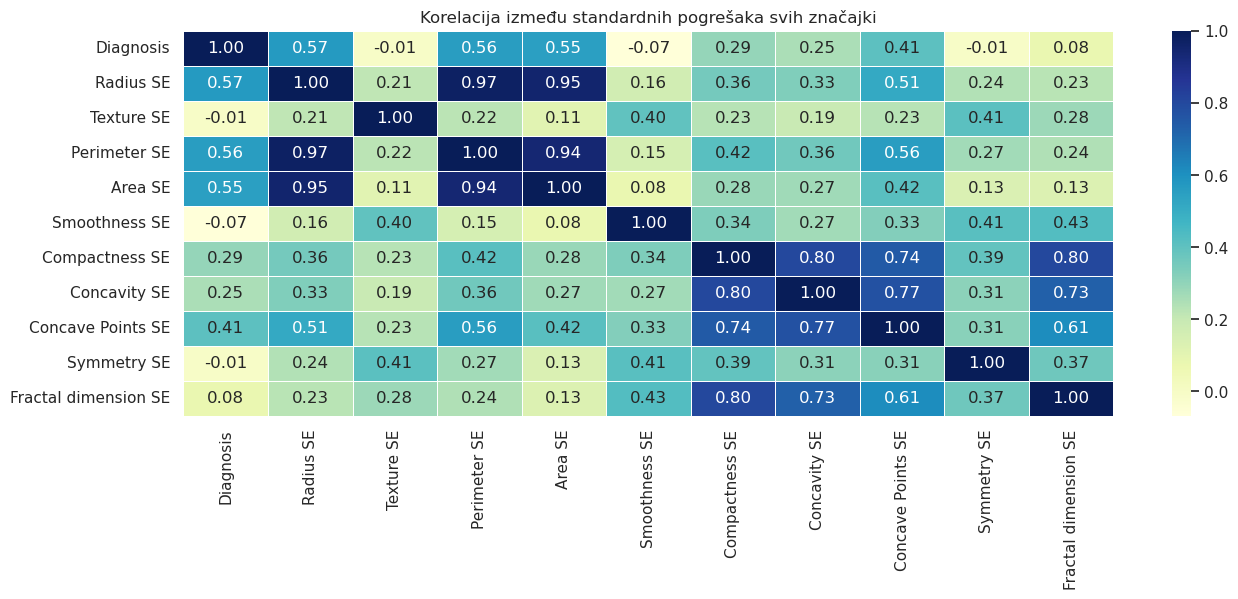

In [730]:
sns.set(rc={'figure.figsize':(15,5)})
se_data = data.loc[:, data.columns.str.contains("SE|Diagnosis")]
sns.heatmap(se_data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Korelacija između standardnih pogrešaka svih značajki")
plt.show()

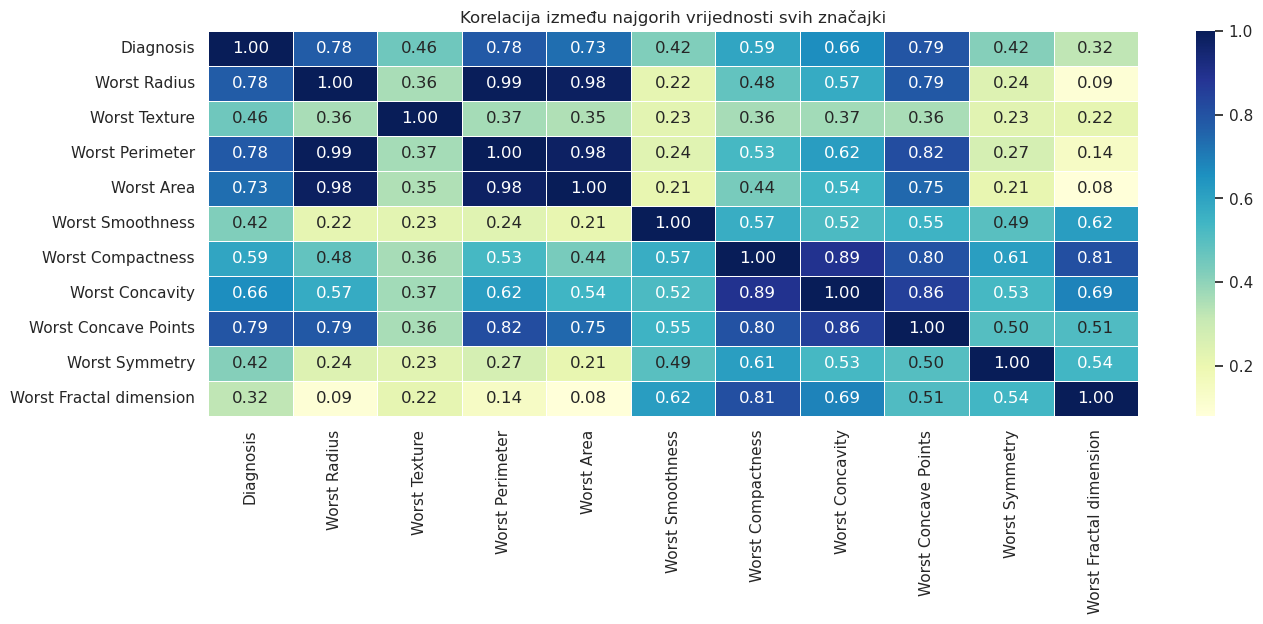

In [731]:
sns.set(rc={'figure.figsize':(15,5)})
worst_data = data.loc[:, data.columns.str.contains("Worst|Diagnosis")]
sns.heatmap(worst_data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Korelacija između najgorih vrijednosti svih značajki")
plt.show()

Očekivano, "Radius", "Perimeter" i "Area" su međusobno visoko korelirani, no zbog važnosti svih triju značajki zasad će ostati u skupu. "Compactness" se računa pomoću "Perimeter" i "Area" te bi se moglo izbaciti.